In [26]:
### Cirq business
import cirq
from cirq import H, X, CNOT, measure, SWAP
from math import pi
from cirq.contrib.svg import SVGCircuit

### Matplotlib business
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 300 # Inline resolution
plt.rcParams['savefig.dpi'] = 300 # Resolution on saving (nbconverter et. al.)
# plt.rcParams.update({'font.size': 14})

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')

### Symbolic math and stuff
import numpy as np

## Task 1: Quantum Computing Part

### Part 1: implement a simple quantum operation with Cirq

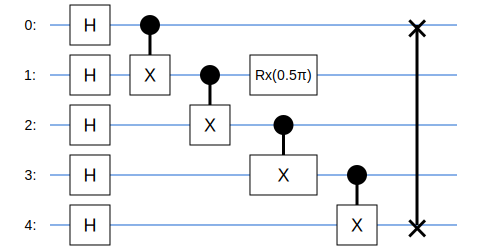

In [18]:
## Define 5 qubit space and circuit object
q5 = cirq.LineQubit.range(5)
circuit = cirq.Circuit()

## Apply Hadamard operation on every Qubit

circuit.append(H(q) for q in q5)

## Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

circuit.append(CNOT(q[i], q[i+1]) for i in range(4))

## SWAP (0, 4)

circuit.append(SWAP(q[0], q[4]))

## Rotate X with pi/2 on any qubit

circuit.append(cirq.rx(pi/2).on(q[1]))

## Plot the circuit

SVGCircuit(circuit)

### Part 2: Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state.

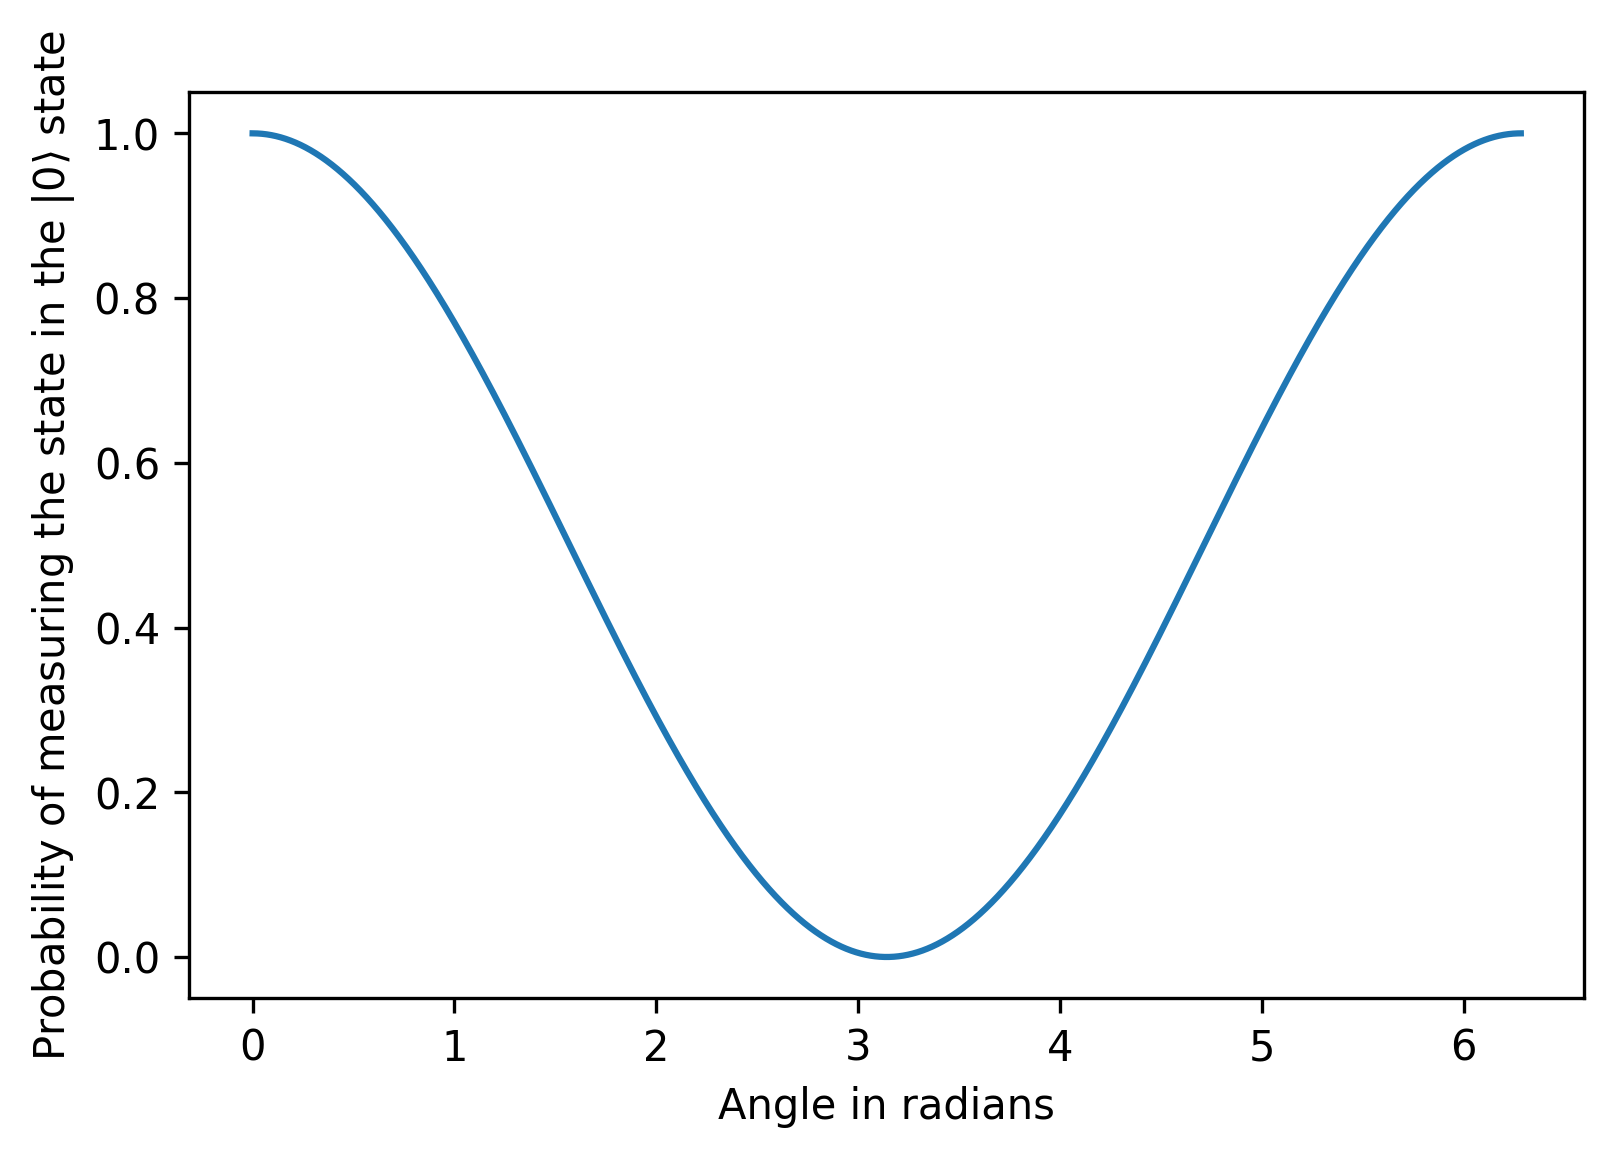

In [38]:
def get_prob_0(angle):
    circuit = cirq.Circuit()
    qubit = cirq.LineQubit.range(1)
    simulator = cirq.Simulator()
    circuit.append(cirq.rx(angle).on(qubit[0]))
    state = simulator.simulate(circuit)
    return abs(state.final_state_vector[0])**2

xs = np.linspace(0, 2*pi, 10000)
ys = [get_prob_0(i) for i in xs]
plt.plot(xs, ys)
plt.xlabel('Angle in radians')
plt.ylabel(r'Probability of measuring the state in the $\left|0\right\rangle$ state')
plt.show()

## Task 4

For Task IV, you will use ParticleNet’s data for Quark/Gluon jet classification available [here](https://zenodo.org/record/3164691#.Ylb_mnUzZrS) with its corresponding description.

- Choose 2 Graph-based architectures of your choice to classify jets as being quarks or gluons. Provide a description on what considerations you have taken to project this point-cloud dataset to a set of interconnected nodes and edges.
- Discuss the resulting performance of the 2 chosen architectures.